In [1]:
.import pandas as pd
import pyupbit
import numpy as np
import time
import matplotlib.pyplot as plt
import datetime

In [6]:
#처음 데이터 다운받는거 (다 받았으면 필요 없음)
a=pyupbit.get_tickers(fiat='KRW')

start_time = datetime.datetime(2017, 10, 1)
to=datetime.datetime(2023, 5, 2)
count = (to - start_time).days

name=a[0]
b=pyupbit.get_ohlcv(name, interval='day' ,count = count)
time = pd.DataFrame(b.index, columns=['time'])
time= time.set_index('time')
high=time
low=time
close=time
value=time
volume=time

for i in range(0,len(a)):
    name = a[i]
    b=pyupbit.get_ohlcv(name, interval='day' ,count = count)
    b.index.name='time'
    
    high_b=b[['high']]
    high_b.columns = [name]
    high= high.join(high_b, how='outer')
    
    low_b=b[['low']]
    low_b.columns = [name]
    low= low.join(low_b, how='outer') 
    
    close_b=b[['close']]
    close_b.columns = [name]
    close= close.join(close_b, how='outer') 
    
    volume_b=b[['volume']]
    volume_b.columns = [name]
    volume= volume.join(volume_b, how='outer') 
    
    value_b=b[['value']]
    value_b.columns = [name]
    value= value.join(value_b, how='outer') 
    
high.to_csv('dhigh.csv', na_rep='', index=True)
low.to_csv('dlow.csv', na_rep='', index=True)
close.to_csv('dclose.csv', na_rep='', index=True)
volume.to_csv('dvolume.csv', na_rep='', index=True)
value.to_csv('dvalue.csv', na_rep='', index=True)

In [2]:
""" 데이터 작업 완료된거임
#데이터 생성 후에 작업

high = pd.read_csv('dhigh.csv', index_col=0)
num=len(high.columns) #회사 개수

high.index = pd.to_datetime(high.index)
low = pd.read_csv('dlow.csv', index_col=0)
low.index = pd.to_datetime(low.index)
close = pd.read_csv('dclose.csv', index_col=0)
close.index = pd.to_datetime(close.index)
value = pd.read_csv('dvalue.csv', index_col=0)
value.index = pd.to_datetime(value.index)
volume = pd.read_csv('dvolume.csv', index_col=0)
volume.index = pd.to_datetime(volume.index)
last_high = high.shift(1)
last_low = low.shift(1)
last_close = close.shift(1)
last_value = value.shift(1)
last_volume = volume.shift(1)
diff_high = np.log(high/last_high)
#diff_high.index = pd.to_datetime(diff_high.index)
diff_low = np.log(low/last_low)
#diff_low.index = pd.to_datetime(diff_low.index)
diff_close = np.log(close/last_close)
#diff_close.index = pd.to_datetime(diff_close.index)
diff_value = np.log(value/last_value)
#diff_value.index = pd.to_datetime(diff_value.index)
diff_volume = np.log(volume/last_volume)
#diff_volume.index = pd.to_datetime(diff_volume.index)
"""

In [7]:
import FinanceDataReader as fdr

# KOSPI 종가 및 거래량 데이터 가져오기
kospi_data = fdr.DataReader('KS11', start='2017-07-14', end='2023-05-20')
kospi_close = kospi_data['Close']
kospi_volume = kospi_data['Volume']

# S&P 500 종가 및 거래량 데이터 가져오기
sp500_data = fdr.DataReader('US500', start='2017-07-14', end='2023-05-20')
sp500_close = sp500_data['Close']
sp500_volume = sp500_data['Volume']

kospi_data.to_csv('Kospi.csv', na_rep='', index=True)
sp500_data.to_csv('S&P500.csv',na_rep='', index=True)


In [11]:
#데이터 작업 완료된거임
diff_close = pd.read_csv('diff_close_df.csv', index_col=0)


df = pd.read_csv('Kospi.csv', index_col=0)
df['last'] = df['Close'].shift(1)
df['Kospi'] = np.log(df['Close']/df['last'])
df['AKospi'] = df['Kospi'].shift(1)
after = df['AKospi']
price1 = df['Close']
df = df['Kospi']


df1 = pd.read_csv('S&P500.csv', index_col=0)
df1['last'] = df1['Close'].shift(1)
df1['SP500'] = np.log(df1['Close']/df1['last'])
price1 = df1['Close']
df1 = df1['SP500']


#수익률 전처리 after = df1['ASP500'] 가 추가로 합쳐야될것
diff_close = pd.merge(diff_close, df, left_index=True, right_index=True, how='outer')
diff_close = pd.merge(diff_close, df1, left_index=True, right_index=True, how='outer')
diff_close = pd.merge(diff_close, after, left_index=True, right_index=True, how='outer')
diff_close['Kospi'] = diff_close['Kospi'].fillna(method='ffill')
diff_close['SP500'] = diff_close['SP500'].fillna(method='ffill')
diff_close['AKospi'] = diff_close['AKospi'].fillna(method='ffill')


#diff_close = diff_close.drop(diff_close[diff_close.index.normalize() == pd.to_datetime('2017-09-25')].index)
diff_close.to_csv('data_diff.csv', na_rep='', index=True)


In [3]:
import pandas as pd
import pyupbit
import numpy as np
import time
import matplotlib.pyplot as plt
import datetime
import FinanceDataReader as fdr



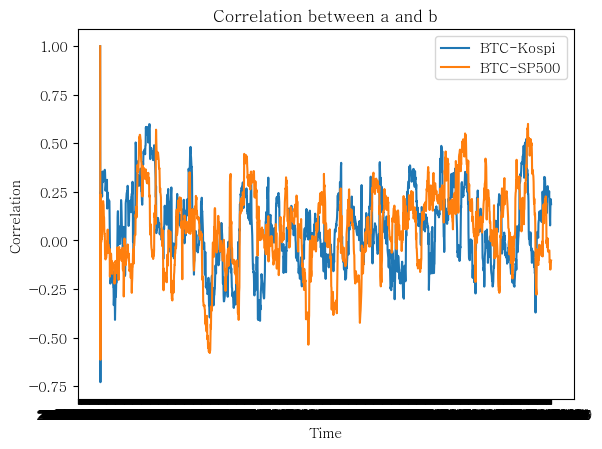

In [7]:
#data_close : 종가 데이터, data_diff : 수익률데이터
diff_close = pd.read_csv('data_diff.csv', index_col=0, encoding='CP949')

window_size = 30
correlations = diff_close.iloc[:,0:1].rolling(window=window_size, min_periods=1).corr(other=diff_close['Kospi']) #이전 30일치를 window 하여 계산 코인과 코스피
correlations1 = diff_close.iloc[:,0:1].rolling(window=window_size, min_periods=1).corr(other=diff_close['SP500']) #이전 30일치를 window 하여 계산 코인과 S&P500
#correlations2 = diff_close['Kospi'].rolling(window=window_size, min_periods=1).corr(other=diff_close['SP500']) #이전 30일치를 window 하여 계산 코스피와 S&P500
#correlations3 = diff_close.iloc[:,0:1].rolling(window=window_size, min_periods=1).corr(other=diff_close['AKospi']) #이전 30일치를 window 하여 계산 코인과 하루뒤 코스피

plt.rcParams["font.family"] = "Batang"
plt.plot(correlations.index, correlations, label='BTC-Kospi')
plt.plot(correlations1.index, correlations1 , label='BTC-SP500')
#plt.plot(correlations2.index, correlations2 , label='SP500-Kospi')
#plt.plot(correlations3.index, correlations3, label='BTC-AKospi')
plt.xlabel('Time')
plt.ylabel('Correlation')
plt.legend()
plt.title('Correlation between a and b')
plt.show()


In [5]:
#그래프 출력해서 저장하고, a 라는 데이터프레임에, 2019년 이후 breakpoint에 대해서 그 이전값을 제거함
import matplotlib.pyplot as plt
import numpy as np
import jenkspy
from matplotlib.dates import YearLocator, DateFormatter

diff_close = pd.read_csv('data_diff.csv', index_col=0, encoding='CP949')
window_size = 30

a=diff_close.copy()
a.index = pd.to_datetime(a.index)
b=diff_close.copy()
b.index = pd.to_datetime(b.index)
for i in range(0,300):
    correlations3 = diff_close[[diff_close.columns[i]]].rolling(window=window_size, min_periods=1).corr(other=diff_close['SP500']) #S&P500 과 코인 corr
    #correlations3 = correlations3.dropna()
    correlations_arr = np.array(correlations3[diff_close.columns[i]].tolist())
    correlations_arr[correlations_arr == np.inf] = np.nan
    correlations_arr[correlations_arr == -np.inf] = np.nan
    med = np.nanmedian(correlations_arr)
    correlations_arr[np.isnan(correlations_arr)] = med
    correlations3.index = pd.to_datetime(correlations3.index) #날짜형 변경

    # 제니스-써핀 알고리즘을 사용하여 최적의 구간을 찾습니다.
    breaks = jenkspy.jenks_breaks(correlations_arr, n_classes=2)

    breaks_jkp=[]
    for v in breaks:
        idx = correlations3.index[correlations3[diff_close.columns[i]] == v][0]
        breaks_jkp.append(idx)
    plt.rcParams["font.family"] = "Batang"
    plt.plot(correlations3.index, correlations3, label=diff_close.columns[i])
    for brk in breaks_jkp:
        plt.axvline(x=brk, color='red', linestyle='--')
    plt.xlabel('Time')
    plt.ylabel('Correlation')
    plt.title('Correlation between '+ diff_close.columns[i] +' and S&P500')
    plt.savefig('graph/'+diff_close.columns[i]+'.png')
    plt.close()
    if len([value for value in breaks_jkp if value.year >= 2019])>0:
        condition_date = min([value for value in breaks_jkp if value.year >= 2019])
        for date in a.index:
            if date < condition_date:
                a.loc[date,diff_close.columns[i]] = np.NAN
            elif date >= condition_date:
                b.loc[date,diff_close.columns[i]] = np.NAN

In [ ]:
#LSTM으로 적합 과정임, 3차원으로 위해서 x input을 이전날값(시계열처럼) 추가하기
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import os
import pandas as pd

L=pd.DataFrame()

for i in range(0,300):
    # 시계열 데이터 준비
    df = a[[a.columns[i], 'SP500']].copy()
    df['last'] = df[a.columns[i]].shift(1)
    df = df.dropna()

    if len(df)>=50:
        sequence_length = 30  # 시퀀스 길이
        input_features = ['last','SP500']  # 입력 열
        target_feature = a.columns[i] # 타겟 열

        # 입력 데이터 생성
        X = []
        y = []
        for ii in range(len(df) - sequence_length):
            X.append(df[input_features].iloc[ii:ii+sequence_length].values)
            y.append(df[target_feature].iloc[ii+sequence_length])
        X = np.array(X)
        y = np.array(y)

        # 데이터 스케일링 (0과 1 사이 값으로 정규화)
        scaler = MinMaxScaler()
        X_scaled = X.reshape(X.shape[0], X.shape[1]*X.shape[2])  # 3차원 데이터를 2차원으로 변경
        X_scaled = scaler.fit_transform(X_scaled)
        X_scaled = X_scaled.reshape(X_scaled.shape[0], X.shape[1], X.shape[2])  # 다시 3차원으로 변경

        # 데이터 분할: 훈련 세트와 테스트 세트
        X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


        # LSTM 모델 생성
        model = Sequential()
        model.add(LSTM(64, input_shape=(X_train.shape[1], X_train.shape[2])))
        model.add(Dense(1))

        # 모델 컴파일
        model.compile(loss='mean_squared_error', optimizer='adam')    
        model_path = 'model'
        filename = os.path.join(model_path, f'model_{i}.h5')
        model.save_weights(filename)

        # 모델 훈련
        model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0)

        # 모델 평가
        loss = model.evaluate(X_test, y_test, verbose=0)

        # 예측 결과
        y_pred = model.predict(X_test) #model_0_path = os.path.join(model_path, 'model_{i}.h5')
                                       #model.load_weights(model_0_path)

        # 예측 결과와 실제 값의 비교 그래프
        plt.figure(figsize=(12, 6))
        plt.plot(y_test, label='Actual')
        plt.plot(y_pred, label='Predicted')
        plt.xlabel('Time')
        plt.ylabel('Value')
        plt.title(a.columns[i]+'-loss:'+str(round(loss,4)))
        plt.legend()
        plt.savefig('graph/'+a.columns[i]+'-loss.png')
        plt.close()

        L.loc[a.columns[i], 'loss'] = loss
    
    # 시계열 데이터 준비 (이전 데이터에 대해서)
    df = b[[b.columns[i], 'SP500']].copy()
    df['last'] = df[b.columns[i]].shift(1)
    df = df.dropna()

    if len(df)>=50:
        sequence_length = 30  # 시퀀스 길이
        input_features = ['last','SP500']  # 입력 열
        target_feature = b.columns[i] # 타겟 열

        # 입력 데이터 생성
        X = []
        y = []
        for ii in range(len(df) - sequence_length):
            X.append(df[input_features].iloc[ii:ii+sequence_length].values)
            y.append(df[target_feature].iloc[ii+sequence_length])
        X = np.array(X)
        y = np.array(y)

        # 데이터 스케일링 (0과 1 사이 값으로 정규화)
        scaler = MinMaxScaler()
        X_scaled = X.reshape(X.shape[0], X.shape[1]*X.shape[2])  # 3차원 데이터를 2차원으로 변경
        X_scaled = scaler.fit_transform(X_scaled)
        X_scaled = X_scaled.reshape(X_scaled.shape[0], X.shape[1], X.shape[2])  # 다시 3차원으로 변경

        # 데이터 분할: 훈련 세트와 테스트 세트
        X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


        # LSTM 모델 생성
        model = Sequential()
        model.add(LSTM(64, input_shape=(X_train.shape[1], X_train.shape[2])))
        model.add(Dense(1))

        # 모델 컴파일
        model.compile(loss='mean_squared_error', optimizer='adam') 
        model_path = 'model'
        filename = os.path.join(model_path, f'model_{i}_last.h5')
        model.save_weights(filename)

        # 모델 훈련
        model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0)

        # 모델 평가
        loss = model.evaluate(X_test, y_test, verbose=0)

        # 예측 결과
        y_pred = model.predict(X_test) #model_0_path = os.path.join(model_path, 'model_{i}.h5')
                                       #model.load_weights(model_0_path)

        # 예측 결과와 실제 값의 비교 그래프
        plt.figure(figsize=(12, 6))
        plt.plot(y_test, label='Actual')
        plt.plot(y_pred, label='Predicted')
        plt.xlabel('Time')
        plt.ylabel('Value')
        plt.title(a.columns[i]+'-loss:'+str(round(loss,4)))
        plt.legend()
        plt.savefig('graph/'+b.columns[i]+'-last_loss.png')
        plt.close()

        L.loc[b.columns[i], 'last_loss'] = loss
    
L.to_csv('Model_loss.csv', na_rep='', index=True)

In [8]:
a.to_csv('after_jen.csv', na_rep='', index=True)
b.to_csv('before_jen.csv', na_rep='', index=True)

In [ ]:
#동화된 친구들만 따로 추추랗기
after_jen = pd.read_csv('after_jen.csv', index_col=0, encoding='CP949')
before_jen = pd.read_csv('before_jen.csv', index_col=0, encoding='CP949')
loss = pd.read_csv('Model_loss.csv', index_col=0, encoding='CP949')
A=pd.DataFrame() 
window_size=30
for i in range(0,300):
    after = after_jen[[after_jen.columns[i]]].rolling(window=window_size, min_periods=1).corr(other=after_jen['SP500']).mean()
    before = before_jen[[before_jen.columns[i]]].rolling(window=window_size, min_periods=1).corr(other=before_jen['SP500']).mean()
    if (after >=- before)[0] and (loss.loc[loss.index[0], "compare"] == "after"):
        A[after_jen.columns[i]]=after_jen[after_jen.columns[i]]
    elif (after <=before)[0] and (loss.loc[loss.index[0], "compare"] == "last"):
        A[before_jen.columns[i]]=before_jen[before_jen.columns[i]]
    B
A.to_csv('domi.csv', na_rep='', index=True)

In [57]:
#동화된 친구들 (코드 정제된 버전)
import pandas as pd

after_jen = pd.read_csv('after_jen.csv', index_col=0, encoding='CP949')
before_jen = pd.read_csv('before_jen.csv', index_col=0, encoding='CP949')
loss = pd.read_csv('Model_loss.csv', index_col=0, encoding='CP949')
data= pd.read_csv('data_diff.csv', index_col=0, encoding='CP949')

A = pd.DataFrame()
B = pd.DataFrame()
window_size = 30

for i in range(0, 300):
    after = after_jen[[after_jen.columns[i]]].rolling(window=window_size, min_periods=1).corr(other=after_jen['SP500']).mean()
    before = before_jen[[before_jen.columns[i]]].rolling(window=window_size, min_periods=1).corr(other=before_jen['SP500']).mean()

    if (after >= before)[0] and (loss.loc[loss.index[0], "compare"] == "after"):
        A = pd.concat([A, after_jen[[after_jen.columns[i]]]], axis=1)
        B = pd.concat([B, data[[data.columns[i]]]], axis=1)
    elif (after <= before)[0] and (loss.loc[loss.index[0], "compare"] == "last"):
        A = pd.concat([A, before_jen[[before_jen.columns[i]]]], axis=1)
        B = pd.concat([B, data[[data.columns[i]]]], axis=1)
    

A.to_csv('domi.csv', na_rep='', index=True)
B.to_csv('domi_data.csv', na_rep='', index=True)

In [ ]:
import os
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

domi = pd.read_csv('domi.csv', index_col=0, encoding='CP949')
domi_data = pd.read_csv('domi_data.csv', index_col=0, encoding='CP949')
data = pd.read_csv('data_diff.csv', index_col=0, encoding='CP949')
loss = pd.read_csv('Model_loss.csv', index_col=0, encoding='CP949')

Exp = pd.DataFrame(index=domi_data.index, columns=domi_data.columns)

model_path = 'model'

matching_columns = [col for col in domi.columns if col in data.columns]
for i, col in enumerate(matching_columns):
    df = pd.concat([domi_data[col], data['SP500']], axis=1).copy()
    df['last'] = df[col].shift(1)
    df = df.dropna()
    
    sequence_length = 30  # 시퀀스 길이
    input_features = ['last','SP500']  # 입력 열
    target_feature = col

    X = []
    y = []
    for ii in range(len(df) - sequence_length):
        X.append(df[input_features].iloc[ii:ii+sequence_length].values)
        y.append(df[target_feature].iloc[ii+sequence_length])
    X = np.array(X)
    y = np.array(y)
    scaler = MinMaxScaler()
    X_scaled = X.reshape(X.shape[0], X.shape[1]*X.shape[2])  # 3차원 데이터를 2차원으로 변경
    X_scaled = scaler.fit_transform(X_scaled)
    X_scaled = X_scaled.reshape(X_scaled.shape[0], X.shape[1], X.shape[2])  # 다시 3차원으로 변경

    index_in_data = data.columns.get_loc(col)
    if loss.loc[loss.index[index_in_data], "compare"] == "after":
        weights_filename = os.path.join(model_path, f'model_{i}.h5')
    elif loss.loc[loss.index[index_in_data], "compare"] == "last":
        weights_filename = os.path.join(model_path, f'model_{i}_last.h5')
        
    # LSTM 모델 정의
    model = Sequential()
    model.add(LSTM(64, input_shape=(X_scaled.shape[1], X_scaled.shape[2])))
    model.add(Dense(1))
   
    # 가중치 로드
    model.load_weights(weights_filename)
    
    # 예측
    predicted_values = model.predict(X_scaled)
    
    # 예측 결과를 Exp에 추가
    Exp.loc[df.index[-len(predicted_values):], col] = np.squeeze(predicted_values)

Exp.to_csv('Exp.csv', na_rep='', index=True)


In [62]:
p = pd.read_csv('close_df.csv', index_col=0, encoding='CP949')

price = pd.DataFrame(index=domi_data.index, columns=domi_data.columns)

matching_columns = [col for col in domi.columns if col in p.columns]
# 일치하는 컬럼의 인덱스 출력
for col in matching_columns:
    price[col] = p[col].copy()

price.to_csv('domi_price.csv', na_rep='', index=True)

In [64]:
#domi 가 domi된것들만, domi_data는 domi된 코인들의 전체 데이터

domi_data = pd.read_csv('domi_data.csv', index_col=0, encoding='CP949')
Exp = pd.read_csv('Exp.csv', index_col=0, encoding='CP949')

B = domi_data - Exp
B[np.isnan(domi_data) | np.isnan(Exp)] = np.nan

B.to_csv('AR.csv', na_rep='', index=True)